Dataset: Spotify dataset

Reference: https://www.kaggle.com/leonardopena/top-50-spotify-songs-by-each-country

Data description:

1. title-       Song’s title.
2. artist-    	Song’s artist.
3. top genre-  	The genre of the track.
4. year-      	Song’ year.
5. added-     	Time when the song was added.
6. bpm-         Beats per minute. The tempo of the song.
7. nrgy-	      Energy. The energy of the song. Higher the value, more energetic the song.
8. dnce-      	Danceability. Higher the value, the easier it is to dance in this song.
9. dB-        	Loudness. Higher the value, louder the song.
10.	live-     	Liveliness. Higher the value, more likely the song is live recording.
11.	val-       	Valence. Higher the value, more positive mood for the song.
12.	dur-      	Duration of song.
13.	acous-	    Acousticness. Higher the value, more acoustic the song.
14.	spch-	      Speechiness. Higher the value, more spoken words the song contain.
15.	pop-      	 Popularity. The higher the value the more popular the song is
16.	country-    	Country where the song was famous


Data has 1000 rows and 16 columns/attributes


In [313]:
import pandas as pd
import numpy as np
df= pd.read_csv("DataSpotify.csv", encoding="iso-8859-1",index_col=0)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
print(df.shape)
df.head()

(1000, 16)


,title,artist,top genre,year,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,country
1,Dance Monkey,Tones and I,australian pop,2019,1969-12-31,98.0,59.0,82.0,-6.0,15.0,51.0,209,69.0,9.0,100,world
2,ROXANNE,Arizona Zervas,pop rap,2019,1969-12-31,117.0,60.0,62.0,-6.0,46.0,46.0,164,5.0,15.0,99,world
3,Memories,Maroon 5,pop,2019,1969-12-31,91.0,32.0,76.0,-7.0,8.0,57.0,189,84.0,5.0,99,world
4,Circles,Post Malone,dfw rap,2019,1969-12-31,120.0,76.0,70.0,-3.0,9.0,55.0,215,19.0,4.0,99,world
5,All I Want for Christmas Is You,Mariah Carey,dance pop,1994,1969-12-31,150.0,63.0,34.0,-7.0,7.0,35.0,241,16.0,4.0,98,world


## Describing the average of 

*   mean
*   standard deviation
*   minimum value
*   Interquartile range (25%, 50%, 75%) and 
*   maximum value of the attributes.



In [314]:
df.describe()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,1000.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,1000.000000,999.000000,999.000000,1000.000000
mean,2010.025000,123.644645,61.650651,64.282282,-6.807808,20.003003,59.732733,206.074000,34.894895,8.703704,81.443000
std,16.904264,31.005120,19.064732,16.032857,3.241313,17.956443,22.000356,51.224198,28.778784,8.432230,13.090229
min,1942.000000,47.000000,10.000000,16.000000,-23.000000,2.000000,5.000000,85.000000,0.000000,2.000000,0.000000
25%,2011.000000,98.000000,49.000000,53.000000,-8.000000,9.000000,42.000000,172.000000,10.000000,4.000000,75.000000
50%,2019.000000,120.000000,65.000000,67.000000,-6.000000,12.000000,61.000000,201.000000,27.000000,5.000000,85.000000
75%,2019.000000,147.000000,76.000000,76.000000,-5.000000,25.000000,77.000000,231.000000,59.000000,9.000000,90.000000
max,2019.000000,205.000000,98.000000,95.000000,0.000000,98.000000,98.000000,464.000000,99.000000,56.000000,100.000000


## Data preprocessing and normalization. Also dropping null values from the data.

In [315]:
from sklearn import preprocessing
df = df.dropna()
df.reset_index()
X= df[['bpm','nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch']]
y= df['pop']
df1 = df.copy()
df = preprocessing.normalize(X)
print(df.shape)
# df1.shape
df

(984, 9)


array([[0.367286  , 0.22112117, 0.30732094, ..., 0.78329362, 0.25859933,
        0.03373035],
       [0.51040145, 0.26174433, 0.27046914, ..., 0.71543451, 0.02181203,
        0.06543608],
       [0.36771054, 0.1293048 , 0.30709891, ..., 0.7637065 , 0.33942511,
        0.02020388],
       ...,
       [0.43948093, 0.07432398, 0.18742569, ..., 0.82725823, 0.26174967,
        0.00969443],
       [0.32394877, 0.18617746, 0.31650167, ..., 0.78566886, 0.24575424,
        0.11543002],
       [0.55193311, 0.0493348 , 0.08633591, ..., 0.77702315, 0.27442484,
        0.00925028]])

## After preprocessing the data, df changes into a numpy array. So we again convert it into a pandas dataframe for further analysis.



In [316]:
df = pd.DataFrame(data = df)
df = df.rename(columns={0:'bpm',
                        1: 'nrgy',
                        2: 'dnce',
                        3: 'dB',
                        4: 'live',
                        5: 'val',
                        6: 'dur',
                        7: 'acous',
                        8: 'spch'})
print(df.shape)
df.head()

(984, 9)


,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,0.367286,0.221121,0.307321,-0.022487,0.056217,0.191139,0.783294,0.258599,0.033730
1,0.510401,0.261744,0.270469,-0.026174,0.200671,0.200671,0.715435,0.021812,0.065436
2,0.367711,0.129305,0.307099,-0.028285,0.032326,0.230324,0.763706,0.339425,0.020204
3,0.438784,0.277897,0.255957,-0.010970,0.032909,0.201109,0.786155,0.069474,0.014626
4,0.507670,0.213221,0.115072,-0.023691,0.023691,0.118456,0.815657,0.054151,0.013538


In [317]:
df1['title']

1                          Dance Monkey
2                               ROXANNE
3                              Memories
4                               Circles
5       All I Want for Christmas Is You
                     ...               
996                            Feelings
997                  Mimpi (feat. Alif)
998                    Cinta Luar Biasa
999                           Haa Tepok
1000                        Hanya Rindu
Name: title, Length: 984, dtype: object

## Assigning the other attributes back to the normalized dataframe.

In [320]:
df['title'] = df1['title']
df['artist'] = df1['artist']
df['top genre'] = df1['top genre']
df['year'] = df1['year']
df['added'] = df1['added']
df['pop'] = df1['pop']
df['country'] = df1['country']
df= df.iloc[1:]
df.head()

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,title,artist,top genre,year,added,pop,country
1,0.510401,0.261744,0.270469,-0.026174,0.200671,0.200671,0.715435,0.021812,0.065436,Dance Monkey,Tones and I,australian pop,2019.0,1969-12-31,100.0,world
2,0.367711,0.129305,0.307099,-0.028285,0.032326,0.230324,0.763706,0.339425,0.020204,ROXANNE,Arizona Zervas,pop rap,2019.0,1969-12-31,99.0,world
3,0.438784,0.277897,0.255957,-0.010970,0.032909,0.201109,0.786155,0.069474,0.014626,Memories,Maroon 5,pop,2019.0,1969-12-31,99.0,world
4,0.507670,0.213221,0.115072,-0.023691,0.023691,0.118456,0.815657,0.054151,0.013538,Circles,Post Malone,dfw rap,2019.0,1969-12-31,99.0,world
5,0.402361,0.077119,0.234710,-0.046942,0.036883,0.080472,0.821487,0.301771,0.033530,All I Want for Christmas Is You,Mariah Carey,dance pop,1994.0,1969-12-31,98.0,world


## Number of unique values of duration, artist, title, genre and country

In [321]:
df['dur'].nunique()

524

In [331]:
df['artist'].nunique()

347

In [335]:
df['title'].nunique()

513

In [329]:
df['top genre'].value_counts()

adult standards        143
latin                  113
dance pop               74
pop                     37
album rock              30
                      ... 
argentine indie          1
punjabi pop              1
classic israeli pop      1
chicha                   1
brazilian edm            1
Name: top genre, Length: 110, dtype: int64

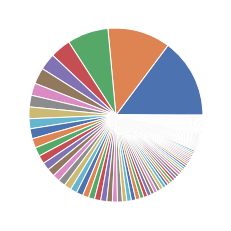

In [328]:
# plt.pie(df['top genre'].value_counts())
# plt.show()

In [332]:
df['country'].value_counts()

brazil       50
spain        50
japan        50
chile        50
italy        50
france       50
israel       50
australia    49
colombia     49
world        49
india        49
canada       49
belgium      49
argentina    49
usa          49
bolivia      49
germany      48
africa       48
indonesia    47
malasya      33
Name: country, dtype: int64

## 1. Checking which song has the highest popularity where 100 is the highest rate of popularity

In [334]:
df.loc[df['pop'] == 100]

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,title,artist,top genre,year,added,pop,country
1,0.510401,0.261744,0.270469,-0.026174,0.200671,0.200671,0.715435,0.021812,0.065436,Dance Monkey,Tones and I,australian pop,2019.0,1969-12-31,100.0,world
51,0.367711,0.129305,0.307099,-0.028285,0.032326,0.230324,0.763706,0.339425,0.020204,Dance Monkey,Tones and I,australian pop,2019.0,1969-12-31,100.0,africa
101,0.372375,0.271186,0.360232,-0.016190,0.040476,0.214520,0.777131,0.016190,0.076904,Dance Monkey,Tones and I,australian pop,2019.0,1969-12-31,100.0,argentina
151,0.482082,0.307133,0.307133,-0.019439,0.038878,0.264367,0.711459,0.003888,0.031102,Dance Monkey,Tones and I,australian pop,2019.0,1969-12-31,100.0,australia
201,0.482082,0.307133,0.307133,-0.019439,0.038878,0.264367,0.711459,0.003888,0.031102,Dance Monkey,Tones and I,australian pop,2019.0,1969-12-31,100.0,belgium
251,0.548050,0.202405,0.233544,-0.018684,0.034253,0.133899,0.756683,0.046709,0.099645,Dance Monkey,Tones and I,australian pop,2019.0,1969-12-31,100.0,bolivia
301,0.534041,0.299063,0.256340,-0.010681,0.039163,0.302623,0.665771,0.149532,0.028482,Dance Monkey,Tones and I,australian pop,2019.0,1969-12-31,100.0,brazil
351,0.583353,0.201653,0.237662,-0.032409,0.028808,0.306080,0.658973,0.180047,0.018005,Dance Monkey,Tones and I,australian pop,2019.0,1969-12-31,100.0,canada
401,0.538079,0.188328,0.336299,-0.035872,0.031388,0.363203,0.587403,0.286975,0.017936,Dance Monkey,Tones and I,australian pop,2019.0,1969-12-31,100.0,germany
451,0.570791,0.265937,0.236749,-0.006486,0.074592,0.220533,0.700516,0.009729,0.048647,Dance Monkey,Tones and I,australian pop,2019.0,1969-12-31,100.0,colombia


##From this, we can say that Dance Monkey is the most popular song.

##2. Correlation matrix/correlation table

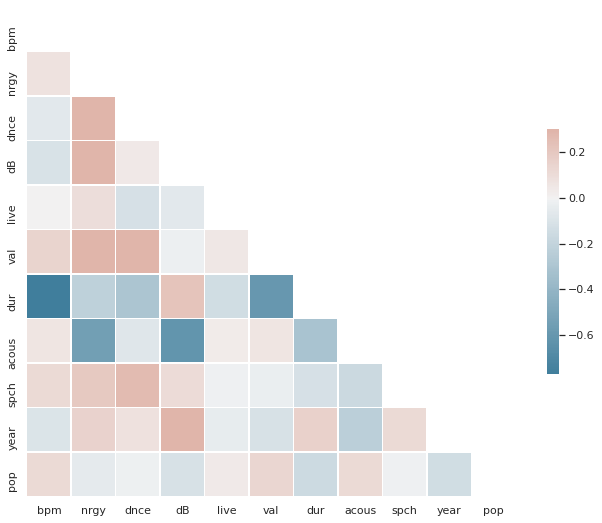

In [336]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

##3. Similarity in music genre of different countries

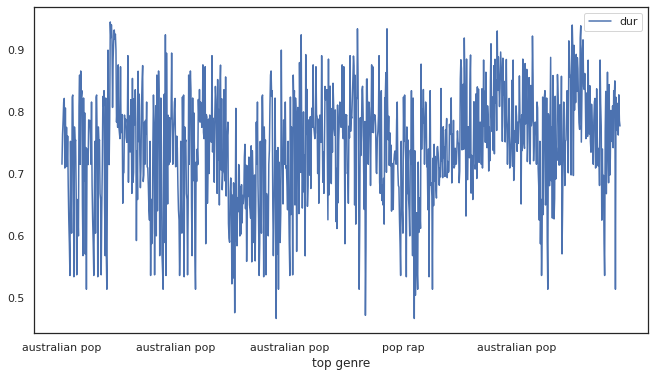

In [339]:
ax = plt.gca()

df.plot(kind='line',x='top genre',y='dur',ax=ax, figsize=(11, 6))

plt.show()

##4. Finding top 10 artists based on popularity

In [340]:
artist_pop = df.groupby('artist').mean()
artist_pop = artist_pop[['pop']]
artist_pop = artist_pop.sort_values(by=['pop'], ascending = False)
artist_pop.head()

,pop
artist,
Maroon 5,99.000000
Arizona Zervas,99.000000
Tones and I,98.944444
Dua Lipa,97.000000
Selena Gomez,97.000000


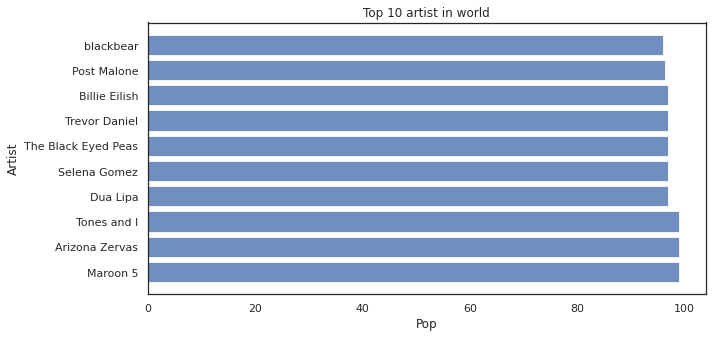

In [341]:
# artist_count  = df['artist'].value_counts()
# artist_count.head()
artist_pop = artist_pop.iloc[:10]
plt.figure(figsize=(10,5))
plt.barh(artist_pop.index, artist_pop['pop'],alpha=0.8)

#sns.barplot(artist_count.index, artist_count.values, alpha=0.8)
plt.title('Top 10 artist in world')
plt.ylabel('Artist', fontsize=12)
plt.xlabel('Pop', fontsize=12)
plt.show()

##5. Finding top 10 top genres based on popularity

In [342]:
genre_pop = df.groupby('top genre').mean()
genre_pop = genre_pop[['pop']]
genre_pop = genre_pop.sort_values(by=['pop'], ascending = False)
genre_pop.head()

,pop
top genre,
australian pop,98.944444
pop rap,97.588235
alternative r&b,97.000000
dfw rap,96.363636
canadian contemporary r&b,95.750000


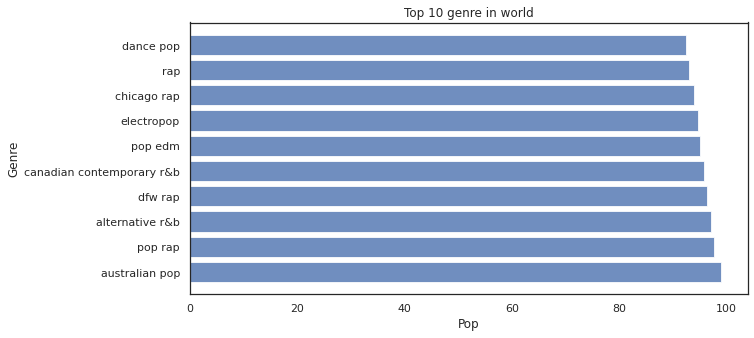

In [344]:
# artist_pop.head()
# genre_count  = df['top genre'].value_counts()
genre_pop = genre_pop.iloc[:10]

plt.figure(figsize=(10,5))
plt.barh(genre_pop.index, genre_pop['pop'],alpha=0.8)

#sns.barplot(artist_count.index, artist_count.values, alpha=0.8)
plt.title('Top 10 genre in world')
plt.ylabel('Genre', fontsize=12)
plt.xlabel('Pop', fontsize=12)
plt.show()

In [346]:
df['dur'].min()

0.46706116865534913

In [347]:
df['dur'].max()

0.9446081588010903

##6. Since there are multiple values of duration therefore values are divided into bins. 

In [349]:
duration_box = (pd.cut(df['dur'], bins=[0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], right=True))
duration_box.value_counts()

(0.7, 0.8]    433
(0.8, 0.9]    250
(0.6, 0.7]    194
(0.5, 0.6]     77
(0.9, 1.0]     25
(0.4, 0.5]      4
Name: dur, dtype: int64

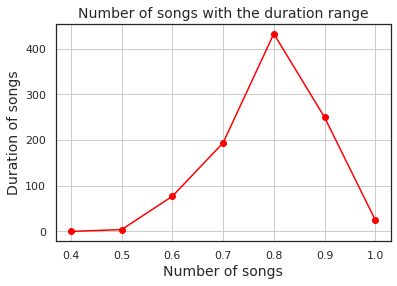

In [350]:
duration = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
num_songs = [0, 4, 77, 194, 433, 250, 25]

plt.plot(duration, num_songs, color='red', marker='o')
plt.title('Number of songs with the duration range', fontsize=14)
plt.xlabel('Number of songs', fontsize=14)
plt.ylabel('Duration of songs', fontsize=14)
plt.grid(True)
plt.show()

Most song durations lie between 0.7 and 0.8.
Note: 0.7 and 0.8 are the normalized values of durations in seconds.

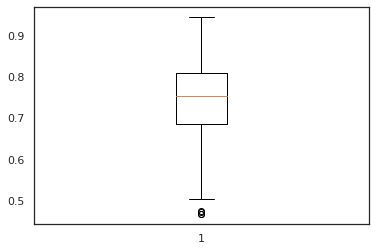

In [351]:
plt.boxplot(df['dur'])
plt.show()

##7. Grouping different countries. All the graphs and visualizations can be done countriwise using these groups.

In [352]:
grouped = df.groupby(df.country)

world = grouped.get_group("world")
africa = grouped.get_group("africa")
argentina = grouped.get_group("argentina")
australia = grouped.get_group("australia")
belgium = grouped.get_group("belgium")
bolivia = grouped.get_group("bolivia")
brazil = grouped.get_group("brazil")
canada = grouped.get_group("canada")
germany = grouped.get_group("germany")
colombia = grouped.get_group("colombia")
chile = grouped.get_group("chile")
spain = grouped.get_group("spain")
usa = grouped.get_group("usa")
france = grouped.get_group("france")
india = grouped.get_group("india")
indonesia = grouped.get_group("indonesia")
israel = grouped.get_group("israel")
italy = grouped.get_group("italy")
japan = grouped.get_group("japan")
malasya = grouped.get_group("malasya")
# print(usa)

##8. Calculate the average of the popularity and the size of each genre in India. (above grouped values/df is used here)

In [353]:
genre_popularity_india = india.groupby("top genre").agg([np.mean, np.size])["pop"]
genre_popularity_india = genre_popularity_india.iloc[:10]

#sort
genre_popularity_india = genre_popularity_india.sort_values(by=["mean"], ascending = False)

print(genre_popularity_india)

                               mean  size
top genre                                
alternative r&b            97.00000   1.0
canadian contemporary r&b  95.00000   2.0
electropop                 94.00000   2.0
dfw rap                    93.50000   2.0
dance pop                  91.00000   1.0
canadian pop               89.00000   1.0
electro house              84.00000   1.0
desi hip hop               67.00000   3.0
desi pop                   66.62069  29.0
bhangra                    56.00000   1.0


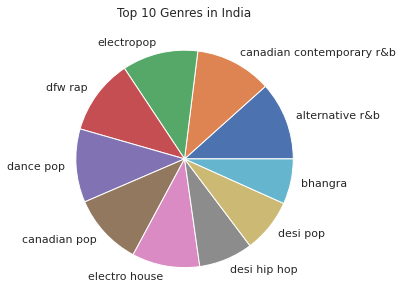

In [354]:
plt.figure(figsize=(10,5))
# plt.barh(genre_popularity_india.index, genre_popularity_india['mean'],alpha=0.8)

#sns.barplot(artist_count.index, artist_count.values, alpha=0.8)
plt.title('Top 10 Genres in India')
# plt.ylabel('Genre', fontsize=12)
# plt.xlabel('Pop', fontsize=12)

plt.pie(genre_popularity_india['mean'], labels=genre_popularity_india.index)
plt.show()

###alternative r&b is the most liked/popular genre in India

##9. Histograms of the attributes

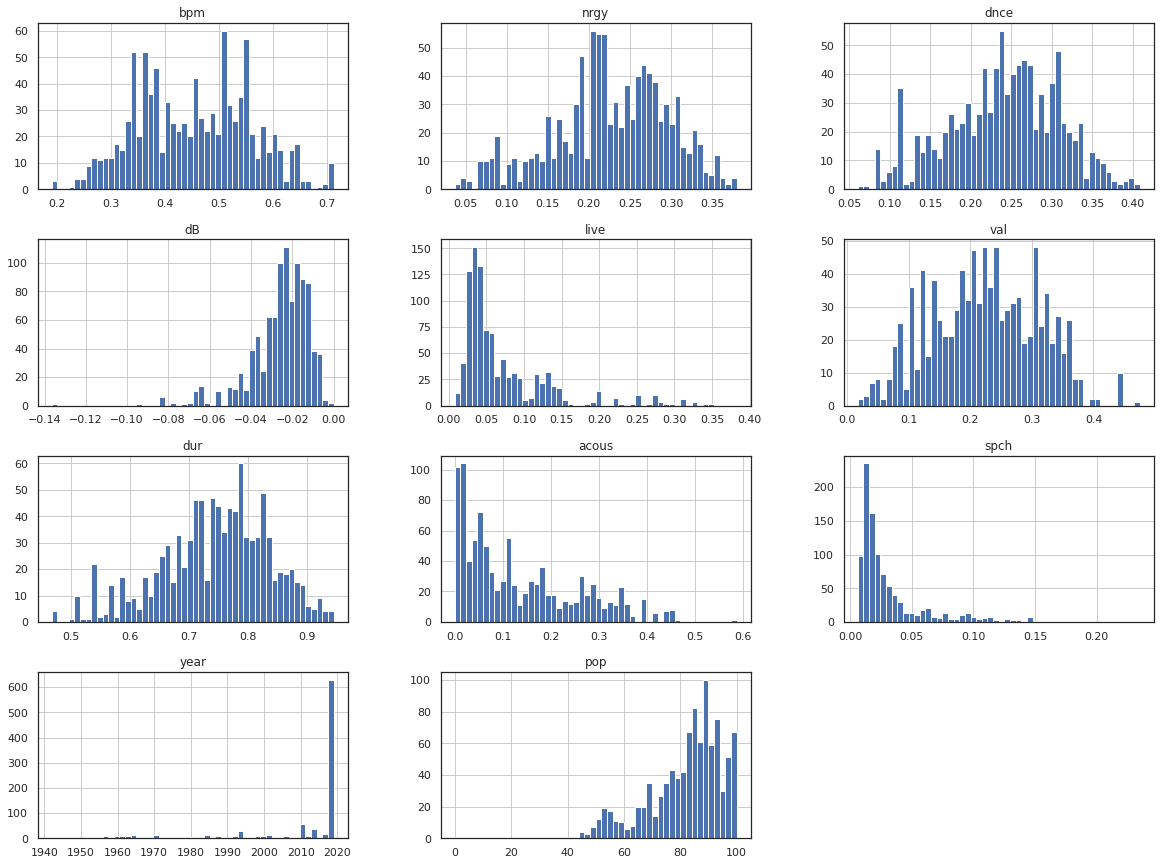

In [307]:
df.hist(bins=50, figsize=(20,15))
plt.show()

From the above graphs we can infer that:
1. As *live* decreases *spch* decreases.
2. As *acous* decreases *spch* decreases.
3. *nrgy*, *bpm*, *dnce*, *val* and *duration* show approximately similar patterns.
4. Songs released in the year 2019 are much higher.

## 10. Scatter plot between dnce, nrgy and bpm to check how correlated they are. (because their pattern is observed quite similar from the above inferences)

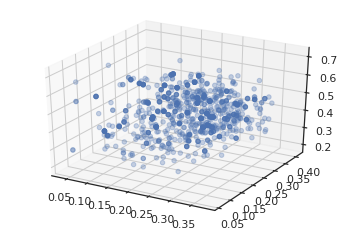

In [368]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection ="3d")
x=df["nrgy"]
y=df["dnce"]
z=df["bpm"]
ax.scatter3D(x, y, z, alpha=0.3, cmap=plt.get_cmap("jet"))
plt.show()
# df.plot(kind="scatter", x="nrgy", y="dnce", z="bpm",alpha=0.3, figsize=(10,7),
#     cmap=plt.get_cmap("jet"), colorbar=True,
#     sharex=False)


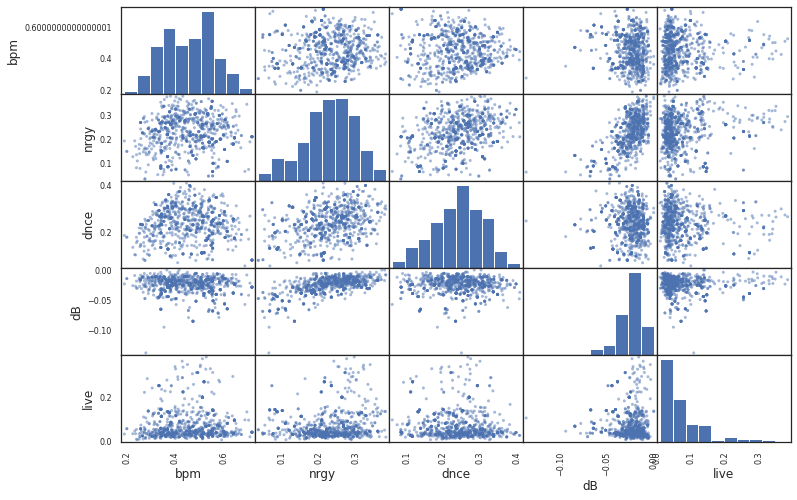

In [369]:
from pandas.plotting import scatter_matrix

attributes = ['bpm',	'nrgy',	'dnce',	'dB',	'live']
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

##11. Training and testing of data to check if any model can be fit.

In [377]:
df= df.dropna()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['bpm','nrgy','dnce','dB','live','val','dur','acous','spch','pop']], df['country'], test_size=0.20, random_state=42)


In [375]:
X_train[~X_train.isin([np.nan, np.inf, -np.inf]).any(1)].astype(np.float64)
X_test[~X_test.isin([np.nan, np.inf, -np.inf]).any(1)].astype(np.float64)

# np.any(np.isnan(X_train))
# np.all(np.isfinite(X_train))
# np.any(np.isnan(X_test))
# np.all(np.isfinite(X_test))


True

In [376]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier()
    ]

from sklearn.metrics import confusion_matrix
for classifier in classifiers:
  model = classifier.fit(X_train, y_train)
  print(classifier)
  print("model score: %.3f" % model.score(X_test, y_test))
  y_pred = classifier.predict(X_test)
  print()
  print(confusion_matrix(y_test, y_pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
model score: 0.160

[[3 2 1 2 1 0 1 1 2 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 2 0 1 0 0 0 1 2 1 0 0 0 0 0 0 0 0]
 [0 2 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0]
 [1 0 2 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0]
 [0 3 0 4 3 0 1 0 1 2 0 0 0 0 0 0 0 0 0 0]
 [3 2 0 1 1 4 0 1 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 3 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0]
 [0 2 1 1 1 1 0 2 0 0 0 0 0 0 1 1 0 1 0 0]
 [1 2 0 0 2 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0]
 [0 2 0 0 1 0 1 1 0 2 0 0 0 0 0 0 0 1 0 0]
 [0 1 1 1 0 0 2 1 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 1 0 3 0 0 0 2 0 1 0 0 0 0 0 0]
 [1 2 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0]
 [2 2 1 1 0 0 0 0 2 0 0 0 0 2 0 1 0 0 0 0]
 [0 2 3 1 2 2 0 1 0 0 1 1 0 0 1 0 1 0 0 0]
 [0 2 1 1 0 1 0 0 1 0 1 0 0 1 0 6 0 0 0 0]
 [0 2 0 1 1 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 3 2 2 1 3 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 2 0 0 2 0 1

###We can see that accuracy is extremely low for all these models. However among these, Random Forest has given the highest accuracy.

In [379]:
df['dB'].value_counts()

-0.022487    15
-0.023691    14
-0.026174    14
-0.038053    12
-0.023376    11
             ..
-0.039544     1
-0.030546     1
-0.029090     1
-0.021267     1
-0.028154     1
Name: dB, Length: 517, dtype: int64

##12. Generating correlation matrix of bpm, nrgy, dnce, dB

In [381]:
#df.columns = ['bpm',	'nrgy',	'dnce',	'dB']
corrM = df[['bpm',	'nrgy',	'dnce',	'dB']].corr() 
corrM 

,bpm,nrgy,dnce,dB,pop
bpm,1.000000,0.079463,-0.068968,-0.100587,0.112338
nrgy,0.079463,1.000000,0.315358,0.630521,-0.047680
dnce,-0.068968,0.315358,1.000000,0.045811,-0.014762
dB,-0.100587,0.630521,0.045811,1.000000,-0.113135
pop,0.112338,-0.047680,-0.014762,-0.113135,1.000000


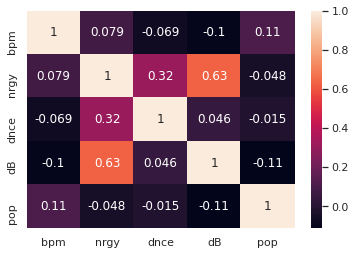

In [382]:
corrMatrix =  df[['bpm',	'nrgy',	'dnce',	'dB', 'pop']].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

###Maximum correlation is between dB and nrgy.
Hypothesis: If the values of dB and nrgy is high for a particular song, that song is most liked by youth. It can also represent the culture of the country where that song is most liked.

In [386]:
df["multiply"] = -df["nrgy"] * df["dB"]
df.head()

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,title,artist,top genre,year,added,pop,country,multiply
1,0.510401,0.261744,0.270469,-0.026174,0.200671,0.200671,0.715435,0.021812,0.065436,Dance Monkey,Tones and I,australian pop,2019.0,1969-12-31,100.0,world,0.006851
2,0.367711,0.129305,0.307099,-0.028285,0.032326,0.230324,0.763706,0.339425,0.020204,ROXANNE,Arizona Zervas,pop rap,2019.0,1969-12-31,99.0,world,0.003657
3,0.438784,0.277897,0.255957,-0.010970,0.032909,0.201109,0.786155,0.069474,0.014626,Memories,Maroon 5,pop,2019.0,1969-12-31,99.0,world,0.003048
4,0.507670,0.213221,0.115072,-0.023691,0.023691,0.118456,0.815657,0.054151,0.013538,Circles,Post Malone,dfw rap,2019.0,1969-12-31,99.0,world,0.005051
5,0.402361,0.077119,0.234710,-0.046942,0.036883,0.080472,0.821487,0.301771,0.033530,All I Want for Christmas Is You,Mariah Carey,dance pop,1994.0,1969-12-31,98.0,world,0.003620


In [398]:
df2= df.nlargest(20, ['multiply'])
df2= df2.drop_duplicates(subset='multiply', keep= False)
df2[['country', 'title', 'artist', 'multiply']]

,country,title,artist,multiply
685,france,Méchant,Niska,0.012784
802,israel,ROXANNE,Arizona Zervas,0.012139
428,germany,Roller,Apache 207,0.011745
871,italy,It's Beginning to Look a Lot like Christmas,Michael Bublé,0.011612
866,italy,Underneath the Tree,Kelly Clarkson,0.011214
185,australia,Holly Jolly Christmas,Michael Bublé,0.010561
879,italy,Soldi in Nero - feat. Sfera Ebbasta,Shiva,0.010476
682,france,Maman ne le sait pas (feat. Niska),Ninho,0.010436
184,australia,Little Saint Nick - 1991 Remix,The Beach Boys,0.010436


Top countries and songs where youth is more or the culture is of listening to loud songs and high energy.

In [399]:
df.nsmallest(20, ['multiply'])
df2= df2.drop_duplicates(subset='multiply', keep= False)
df2[['country', 'title', 'artist', 'multiply']]

,country,title,artist,multiply
685,france,Méchant,Niska,0.012784
802,israel,ROXANNE,Arizona Zervas,0.012139
428,germany,Roller,Apache 207,0.011745
871,italy,It's Beginning to Look a Lot like Christmas,Michael Bublé,0.011612
866,italy,Underneath the Tree,Kelly Clarkson,0.011214
185,australia,Holly Jolly Christmas,Michael Bublé,0.010561
879,italy,Soldi in Nero - feat. Sfera Ebbasta,Shiva,0.010476
682,france,Maman ne le sait pas (feat. Niska),Ninho,0.010436
184,australia,Little Saint Nick - 1991 Remix,The Beach Boys,0.010436


Bottom countries and songs where youth is more or the culture is of listening to less loud songs and low energy.

##My contributions: 
* Top 5 artists based on popularity
1. Maroon 5-	         99.000000
2. Arizona Zervas-	   99.000000
3. Tones and I-	     98.944444
4. Dua Lipa-          97.000000
5. Selena Gomez-      97.000000

* Top 5 genres based on popularity
1. australian pop-	            98.944444
2. pop rap        -            97.588235
3. alternative r&b-	          97.000000
4. dfw rap	       -           96.363636
5. canadian contemporary r&b-	95.750000


* Top 5 genre in India based on popularity
1. pop rap    -                99.00000        
2. pop         -               97.50000        
3. alternative r&b-            97.00000        
4. canadian contemporary r&b - 95.00000        
5. electropop                 -94.00000        

* Dance Monkey is the most popular song in the world.

* alternative r&b is the most liked/popular genre in India.

* Most song durations lie between 0.7 and 0.8.

* The accuracy is extremely low for all the models. However among these, Random Forest has given the highest accuracy.

* Maximum correlation is between dB and nrgy.

* Hypothesis: If the values of dB and nrgy is high for a particular song, that song is most liked by youth. It can also represent the culture of the country where that song is most liked.

* From the *multiply* column we can estimate that France has the maximum youth and their culture is to listen to more loud music whereas Australia has the minimum youth and their culture is to listen to less loud music.


* Other:
1. As *live* decreases *spch* decreases.
2. As *acous* decreases *spch* decreases.
3. *nrgy*, *bpm*, *dnce*, *val* and *duration* show approximately similar patterns.
4. Songs released in the year 2019 are much higher.




